# Analyzing the LDA Vs. NMF Dimensionality Reduction experiment

Nick Lines  

In this notebook we'll analyze the results of the LDA vs. NMF experiment.

## Environment setup

In [42]:
%pylab inline
plt.style.use('dark_background')
import pandas as pd
import mlflow as ml
from mlflow.tracking import MlflowClient

Populating the interactive namespace from numpy and matplotlib


## Gather the results from mlflow's tracking system

In [57]:
exp_name = "topic_DR_stats_2"
ex = ml.get_experiment_by_name(exp_name)

In [58]:
print(ex.to_proto())

experiment_id: "3"
name: "topic_DR_stats_2"
artifact_location: "file:///home/ubuntu/topic_model_dimensionality_reduction/NOTEBOOKS/mlruns/3"
lifecycle_stage: "active"



In [59]:
client = MlflowClient()
exp_id = client.get_experiment_by_name(exp_name).experiment_id

In [60]:
runs = ml.search_runs(exp_id,)

In [61]:
runs = runs.dropna()

In [62]:
runs["params.number_of_topics"] = runs["params.number_of_topics"].astype(int)

In [63]:
metrics = [metric for metric in runs.columns if "metrics." in metric]
for metric in metrics:
    runs[metric] = runs[metric].astype(float)

In [64]:
runs = runs.sort_values(by="params.number_of_topics",)

## Analyze the results

In [65]:
df = runs[metrics + [n for n in runs.columns if "params" in n]]

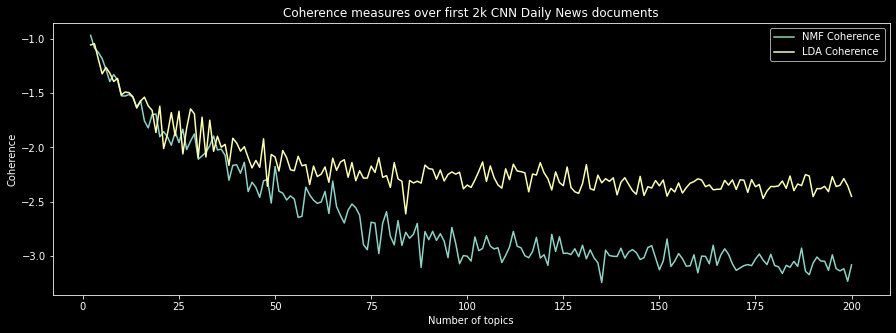

In [66]:
figure(figsize(15,5));
xlabel("Number of topics")
ylabel("Coherence")
title("Coherence measures over first 2k CNN Daily News documents")
plot(runs["params.number_of_topics"], runs["metrics.mean_coh_nmf"], label="NMF Coherence")
plot(runs["params.number_of_topics"], runs["metrics.mean_coh_lda"], label="LDA Coherence");
legend();

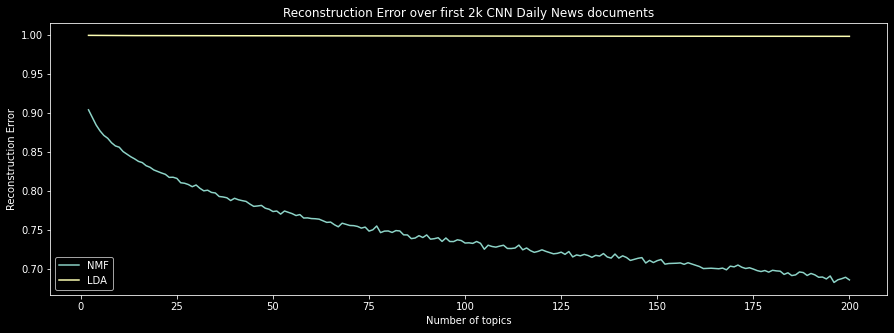

In [67]:
figure(figsize(15,5));
xlabel("Number of topics")
ylabel("Reconstruction Error")
title("Reconstruction Error over first 2k CNN Daily News documents")
plot(runs["params.number_of_topics"], runs["metrics.recon_error_nmf"], label="NMF")
plot(runs["params.number_of_topics"], runs["metrics.recon_error_lda"], label="LDA");
legend();

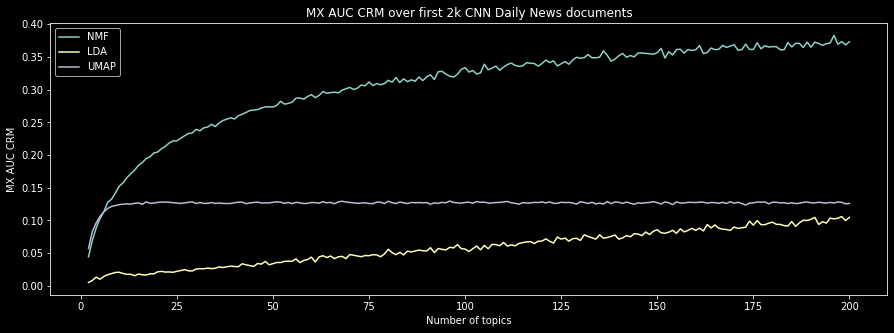

In [68]:
figure(figsize(15,5));
xlabel("Number of topics")
ylabel("MX AUC CRM")
title("MX AUC CRM over first 2k CNN Daily News documents")
plot(runs["params.number_of_topics"], runs["metrics.rnx_auc_crm_nmf"], label="NMF")
plot(runs["params.number_of_topics"], runs["metrics.rnx_auc_crm_lda"], label="LDA");
plot(runs["params.number_of_topics"], runs["metrics.rnx_auc_crm_umap"], label="UMAP");
legend();

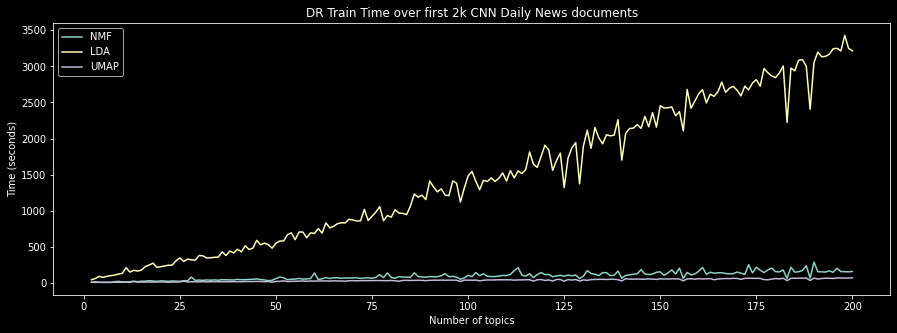

In [69]:
figure(figsize(15,5));
xlabel("Number of topics")
ylabel("Time (seconds)")
title("DR Train Time over first 2k CNN Daily News documents")
plot(runs["params.number_of_topics"], runs["metrics.nmf_train_time"], label="NMF")
plot(runs["params.number_of_topics"], runs["metrics.lda_train_time"], label="LDA");
plot(runs["params.number_of_topics"], runs["metrics.umap_train_time"], label="UMAP");
legend();

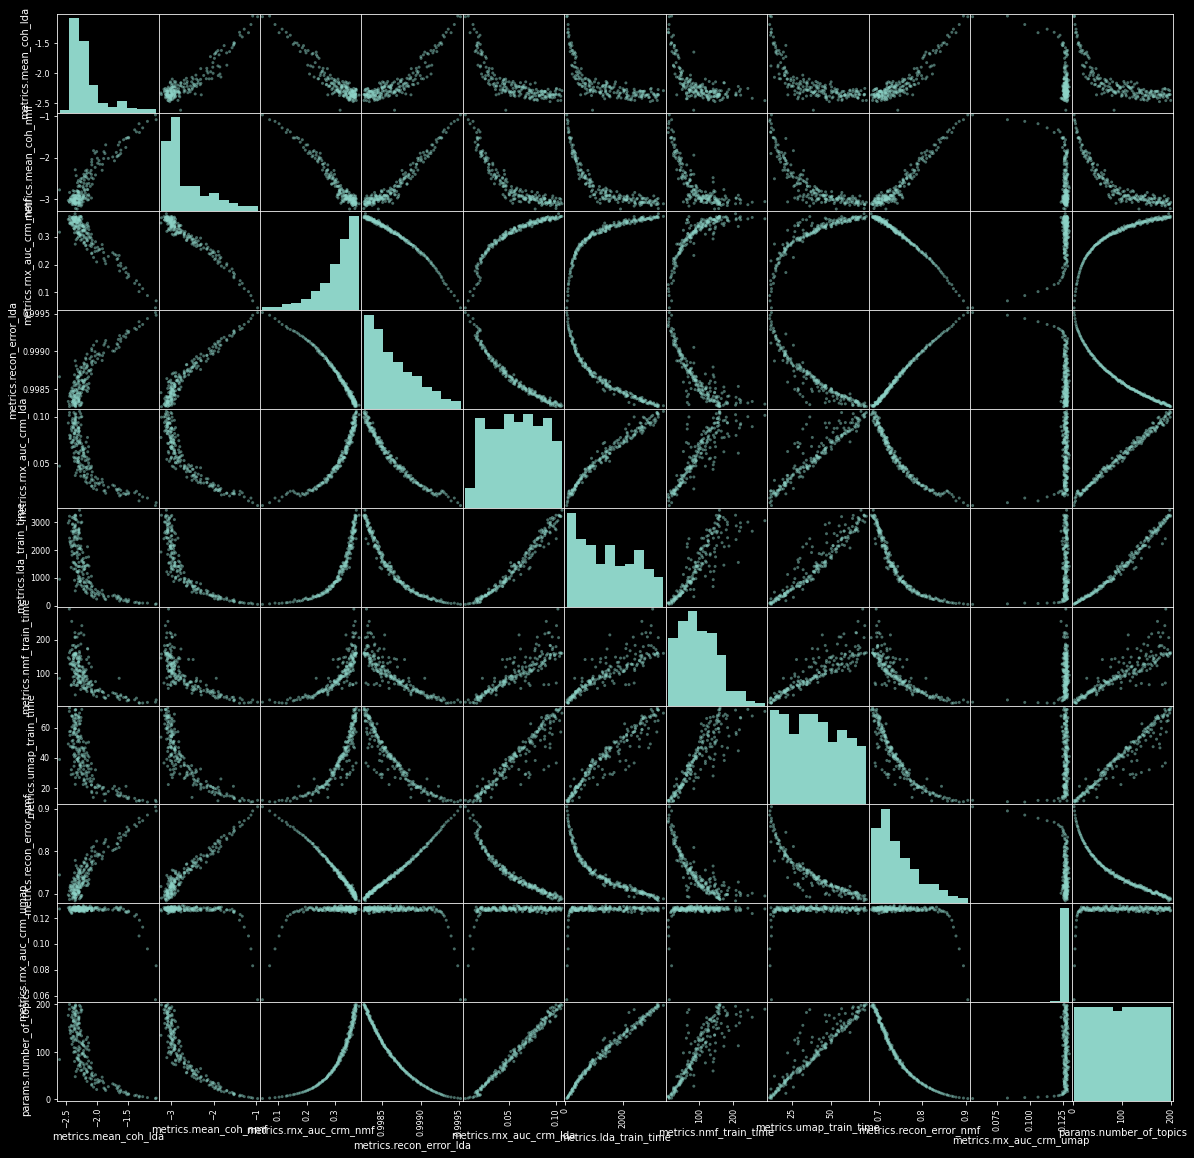

In [70]:
pd.plotting.scatter_matrix(df,figsize=(20,20));